# Cuisine Combination

## Objectives

- Identify the most common combinations of cuisines in the dataset.
- Determine if certain cuisine combinations tend to have higher ratings. 

## Methodology

- Identify the Most Common Cuisines Combination.
- Determine if Certain Combinations Have Higher Ratings.
- Bar Chart for Most Common Cuisine Combinations.
- Scatter Plot of Rating vs. Frequency.

In [1]:
# Loading Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Loading Cleaned Dataset

df_cleaned = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\Cognifyz_Test\Dataset\Cleaned_Dataset.csv')

In [10]:
# Identify the Most Common Cuisine Combinations

# Count occurrences of each cuisine combination
common_combos = Counter(df_cleaned['Cuisine Combination']).most_common(10)

# Convert to DataFrame
common_combos_df = pd.DataFrame(common_combos, columns=['Cuisine Combination', 'Count'])
print(common_combos_df)

              Cuisine Combination  Count
0                    North Indian    936
1           Chinese, North Indian    616
2           Mughlai, North Indian    394
3                         Chinese    354
4                       Fast Food    354
5  Chinese, Mughlai, North Indian    306
6                            Cafe    299
7                          Bakery    218
8                Bakery, Desserts    181
9              Chinese, Fast Food    159


In [11]:
# Determine if Certain Combinations Have Higher Ratings

# Calculate average rating for each combination
cuisine_ratings = (
    df_cleaned.groupby('Cuisine Combination')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Merge the counts and ratings
merged_data = pd.merge(common_combos_df, cuisine_ratings, on='Cuisine Combination', how='left')
merged_data.columns = ['Cuisine Combination', 'Count', 'Average Rating']

# Display the resulting merged DataFrame
print(merged_data)

              Cuisine Combination  Count  Average Rating
0                    North Indian    936        1.672329
1           Chinese, North Indian    616        2.333442
2           Mughlai, North Indian    394        2.767259
3                         Chinese    354        2.042090
4                       Fast Food    354        2.118362
5  Chinese, Mughlai, North Indian    306        2.619935
6                            Cafe    299        2.890970
7                          Bakery    218        1.924312
8                Bakery, Desserts    181        2.375691
9              Chinese, Fast Food    159        2.069811


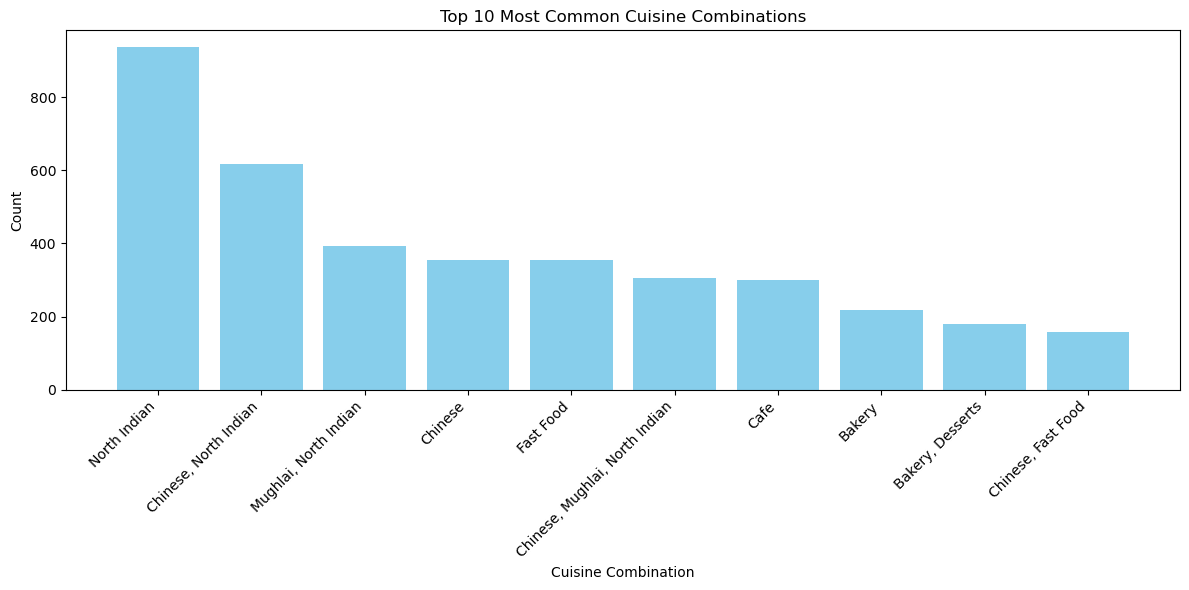

In [12]:
# Bar Chart for Most Common Cuisine Combinations

plt.figure(figsize=(12,6))
plt.bar(merged_data['Cuisine Combination'], merged_data['Count'], color='skyblue')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

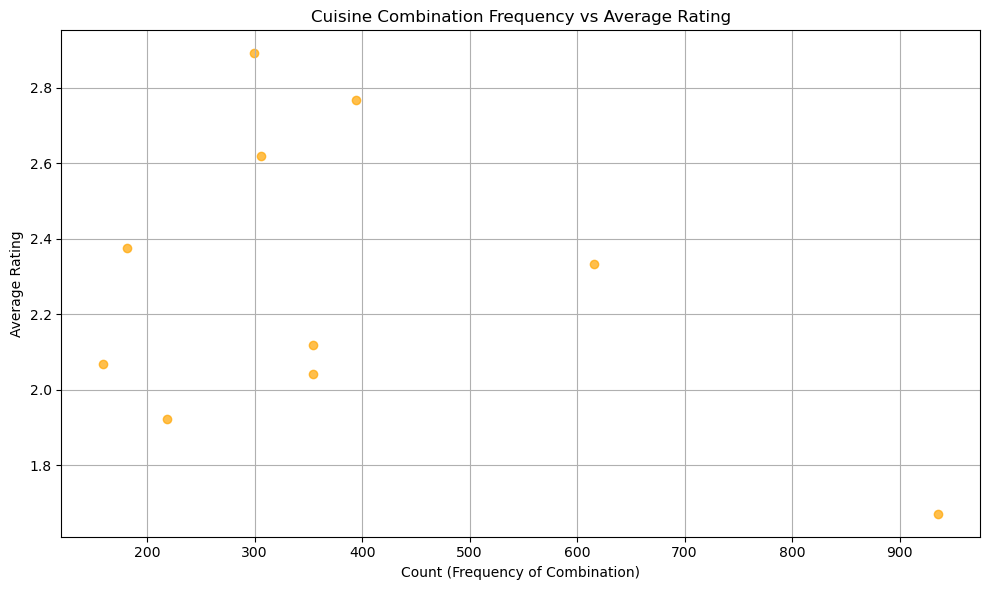

In [13]:
# Scatter Plot of Rating vs. Frequency
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Count'], merged_data['Average Rating'], color='orange', alpha=0.7)
plt.title('Cuisine Combination Frequency vs Average Rating')
plt.xlabel('Count (Frequency of Combination)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()